# Assignment 5

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import animatplot as amp

from numpy import exp
from textwrap import wrap

## 6) COMPUTATION: Finite Difference Time Domain method (extended)

In [2]:
x_space = np.arange(-400, 401, 1)

In [3]:
t_max = 500
imp0 = 377
H_y = np.zeros((t_max, len(x_space)))
E_z = np.zeros((t_max, len(x_space)))
temp1 = np.zeros(len(x_space))
temp2 = np.zeros(len(x_space))
R = np.zeros(len(x_space)) + 1
# muR = np.zeros(len(x_space)) + 1

R[400-140] = R[400+140] = 5
R[:400-200] = R[400+200:] = 10**10
# muR[70] = 5

for i in range(0, t_max, 1):
    temp1[len(x_space)-1] = temp1[len(x_space)-2]
    for j in range(0, len(x_space)-1, 1):
        temp1[j] += (temp2[j+1] - temp2[j]) / imp0 / R[j]
    
    temp2[0] = temp2[1]
    for j in range(1, len(x_space), 1):    
        temp2[j] += (temp1[j] - temp1[j-1]) * imp0 / R[j]
    
    temp2[400] += exp(-(i-30)*(i-30)/100)
    
    E_z[i,:] = temp2[:]
    H_y[i,:] = temp1[:]

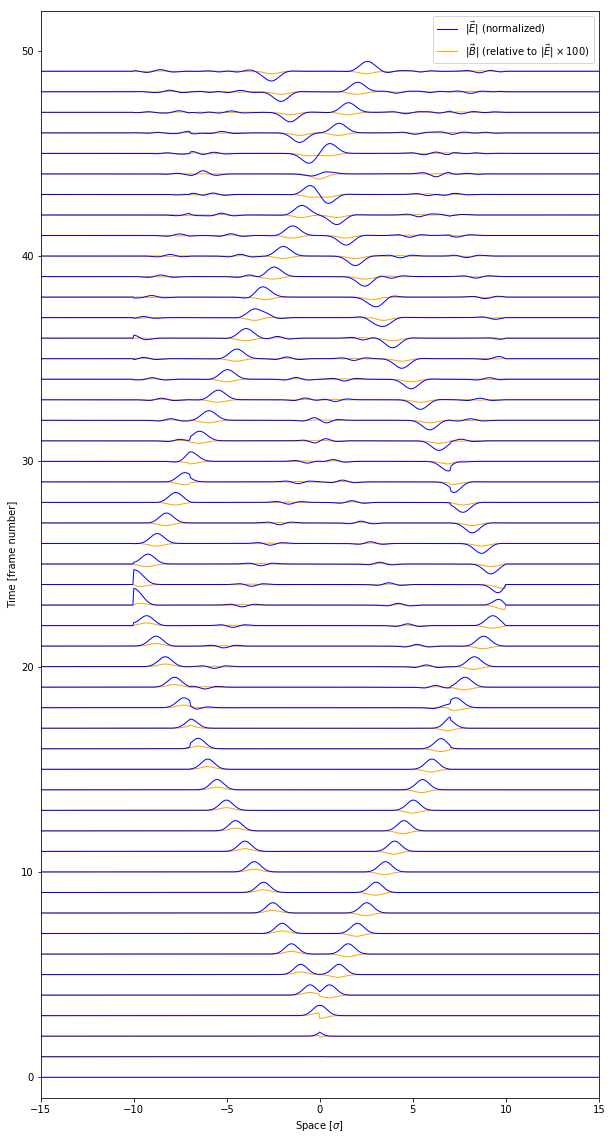

In [8]:
plt.figure(figsize = (10, 20))
for i in range(0, t_max, 10):
    plt.plot(x_space/20, E_z[i, :] + i/10, color="b", zorder=1, linewidth=1)
    plt.plot(x_space/20, H_y[i, :]*100 + i/10, color="orange", zorder=0, linewidth=1)
    
plt.xlim([-15, 15])
plt.ylim(-1, )
plt.legend((r'$|\vec{E}|$ (normalized)', r'$|\vec{B}|$ (relative to $|\vec{E}| \times 100$)'))
plt.xlabel(r'Space [$\sigma$]')
plt.ylabel('Time [frame number]')
plt.show()

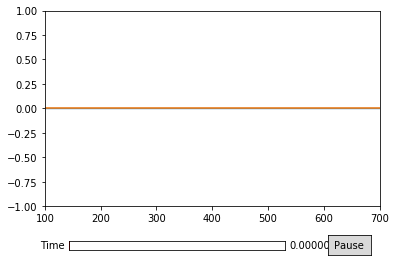

In [5]:
# %matplotlib qt
# Animation
# =========
# def ani_func(i, E=E_z):
#     return E[:, i]
t = np.linspace(0, 0.001, 500)
timeline = amp.Timeline(t, units='s', fps=60)

fig = plt.figure()
block1 = amp.blocks.Line(E_z)
block2 = amp.blocks.Line(H_y*100)
anim = amp.Animation([block1, block2], timeline)

plt.ylim([-1, 1])
plt.xlim([100, 700])
# plt.tick_params(axis='both', which='both', 
#            bottom=False, top=False, left=False, right=False,
#            labelbottom=False, labeltop=False, labelleft=False, labelright=False,
#            labelsize=0)

anim.controls({'valfmt':'%.5f'})
#anim.timeline_slider(valfmt='%.5f')
#anim.toggle()
# anim.save_gif('ising')


#ani = FuncAnimation(fig, ani_func, frames=np.linspace(0, 200, 200), blit=True)
plt.show()